In [1]:
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict
from tqdm.autonotebook import tqdm
#import pandas as pd
import mysql.connector
import codecs
codecs.register(lambda name: codecs.lookup('utf8') if name == 'utf8mb4' else None)
import re
import conllu

In [3]:
db = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd='password',
  database='pruned_commits_db2',
  charset='utf8mb4')

cur = db.cursor()
cur.execute('SELECT lemma FROM lemmas ORDER BY id LIMIT 100')
top_lemmas = set([i[0] for i in cur.fetchall()])

In [2]:
res = []
for line in open('../../data/junk/top_words.txt'):
    res.append(line.strip())
top_lemmas = set(res[:100])

In [31]:
db = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd='password',
  database='commits_db',
  charset='utf8mb4')

cur = db.cursor()

In [32]:
def yield_pos_short():
    #mycursor.execute('SELECT conllu, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id LIMIT 1000;')
    cur.execute('SELECT conllu, date FROM C')# LIMIT 1000')
    text = cur.fetchone()
    while text:
        #doc = conllu.parse(text[0])
        doc = re.findall('sent_id', text[0])
        date = text[1]
        if len(doc) > 0:
            doc = conllu.parse(text[0])
            if len(doc[0].tokens) <= 20:
                string = []
                if doc[0].tokens[0]['lemma'] in top_lemmas:
                    string.append(doc[0].tokens[0]['lemma'])
                    for i in doc[0].tokens[1:]:
                        string.append(i['upostag'])
                    yield ' '.join(string)+'\t'+date[:4]
        text = cur.fetchone()

In [33]:
file = open('C:\\Users\\Glaz\\Downloads\\github\\top_first_freq.txt', 'w', encoding='utf-8')
for i in tqdm(yield_pos_short()):
    print (i, file=file)
file.close()

In [34]:
def yield_pos_short():
    #mycursor.execute('SELECT conllu, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id LIMIT 1000;')
    cur.execute('SELECT date FROM C')# LIMIT 1000')
    text = cur.fetchone()
    while text:
        yield text[0][:4]
        text = cur.fetchone()
before = 0
after = 0
for date in tqdm(yield_pos_short()):
    #print(date)
    if date > '2016-01-01':
        after += 1
    elif date < '2010-01-01':
        before += 1 

In [35]:
before, after

(11596100, 18460377)

In [36]:
! sort C:/Users/Glaz/Downloads/github/top_first_freq.txt /T . > C:/Users/Glaz/Downloads/github/top_first_freq_sorted.txt

ЏаҐ¤гЇаҐ¦¤Ґ­ЁҐ: Є Є Їа ўЁ«®, ЁбЇ®«м§®ў ­ЁҐ ЇҐаҐ­ Їа ў«Ґ­­®Ј® ўлў®¤  ЇаЁ Ў®«ми®¬

®ЎкҐ¬Ґ б®авЁа®ўЄЁ - ¬Ґ¤«Ґ­­ҐҐ, зҐ¬ пў­®Ґ ®ЇаҐ¤Ґ«Ґ­ЁҐ  ®вб®авЁа®ў ­­®Ј® д ©« .




In [28]:
! tail C:/Users/Glaz/Downloads/github/top_first_freq_sorted.txt

"tail" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [2]:
top = 100
k = 0
string = ''
counts = {}
before = 0
after = 0
for line in open('C:/Users/Glaz/Downloads/github/top_first_freq_sorted.txt', encoding='utf-8'):
    if line.strip() != '':
        text, date = line.strip().split('\t')
        if text != string:
            if before + after > top:
                counts[string] = [before, after]
            k = 1
            before = 0
            after = 0
            if date > '2016-01-01':
                after += 1
            elif date < '2010-01-01':
                before += 1
            string = text
        else:
            k += 1
            if date > '2016-01-01':
                after += 1
            elif date < '2010-01-01':
                before += 1

In [26]:
line.strip().split('\t')

['2007']

In [3]:
counts

{'add ADJ ADJ NOUN ADP ADJ NOUN': [19, 87],
 'add ADJ ADJ NOUN ADP NOUN NOUN': [37, 174],
 'add ADJ ADJ NOUN ADP NOUN PUNCT': [64, 38],
 'add ADJ ADJ NOUN ADP NOUN': [82, 253],
 'add ADJ ADJ NOUN ADP PROPN': [54, 145],
 'add ADJ ADJ NOUN NOUN NOUN': [44, 180],
 'add ADJ ADJ NOUN NOUN PUNCT': [215, 185],
 'add ADJ ADJ NOUN NOUN': [315, 905],
 'add ADJ ADJ NOUN PART VERB': [53, 74],
 'add ADJ ADJ NOUN PUNCT NOUN NUM PUNCT': [4, 162],
 'add ADJ ADJ NOUN PUNCT': [954, 386],
 'add ADJ ADJ NOUN': [681, 1866],
 'add ADJ ADP ADJ NOUN': [66, 139],
 'add ADJ ADP NOUN NOUN': [38, 184],
 'add ADJ ADP NOUN': [53, 192],
 'add ADJ CCONJ ADJ NOUN NOUN': [49, 139],
 'add ADJ CCONJ ADJ NOUN PUNCT': [109, 54],
 'add ADJ CCONJ ADJ NOUN': [151, 309],
 'add ADJ CCONJ ADJ': [28, 74],
 'add ADJ NOUN ADJ NOUN PUNCT': [69, 44],
 'add ADJ NOUN ADJ NOUN': [65, 185],
 'add ADJ NOUN ADP ADJ ADJ NOUN': [53, 111],
 'add ADJ NOUN ADP ADJ NOUN ADP NOUN': [41, 131],
 'add ADJ NOUN ADP ADJ NOUN NOUN NOUN': [42, 174],
 'a

In [39]:
file = open('C:/Users/Glaz/Downloads/github/top_schemes.txt', 'w')
for key in sorted(counts, key=lambda x: sum(counts[x]), reverse=True):
    print('{}\t{}\t{}'.format(counts[key][0], counts[key][1], key), file=file)
file.close()

In [37]:
! head /home/dkbrz/git_commits/top_schemes.txt

579	3	merge NOUN PUNCT NOUN PUNCT ADP NOUN
520	1	merge NOUN PUNCT NOUN PUNCT
397	44	update NOUN
235	0	git PUNCT NOUN PUNCT NOUN PUNCT NUM NUM
192	12	version NOUN ADP NUM
188	10	add NOUN NOUN
181	2	merge NOUN PUNCT NOUN PUNCT NOUN PUNCT
141	22	remove ADJ NOUN
152	4	merge NOUN PUNCT NOUN PUNCT ADP PUNCT NOUN
148	3	add NOUN


In [8]:
before = 0
k = 0
for key in sorted(counts, key=lambda x: counts[x][0], reverse=True):
    k += 1
    before += counts[key][0]
    if k >= 1000:
        break

In [10]:
after = 0
k = 0
for key in sorted(counts, key=lambda x: counts[x][1], reverse=True):
    k += 1
    after += counts[key][1]
    if k >= 1000:
        break

In [40]:
before, after = 0, 0 
for key in counts:
    before += counts[key][0]
    after += counts[key][1]

In [11]:
before, after

(1659356, 5252857)

In [12]:
b, a = 11596100, 18460377
before/b, after/a

(0.14309604091030606, 0.28454765577106034)

In [48]:
file = open('C:/Users/Glaz/Downloads/github/top_schemes2.txt', 'w')
for key in sorted(counts, key=lambda x: sum(counts[x]), reverse=True):
    print('{:.2}\t{:2}\t{}'.format(counts[key][0]/b*100, counts[key][1]/a*100, key), file=file)
file.close()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pandas as pd

In [27]:
df = pd.DataFrame([[11596100-1659356, 1659356], [18460377-5252857,5252857]])
df.colums = ['Other', 'Top-1000']
df.index = ['Before 2010', 'After 2015']

Text(0, 0.5, 'Number of commits')

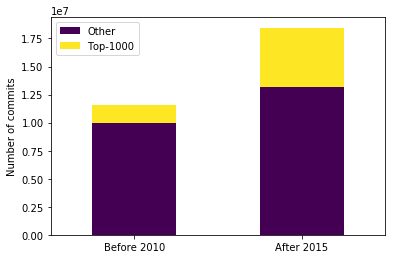

In [30]:
df.plot.bar(stacked=True, colormap='viridis', rot=0)
plt.legend(['Other', 'Top-1000'])
plt.ylabel('Number of commits')
#plt.xticks(labels=['Before', 'After'])